# Projet Machine-Learning par Antoine Théologien
## Test du multiclasse

Époque 0, Perte : 0.0850
Époque 50, Perte : 0.0001


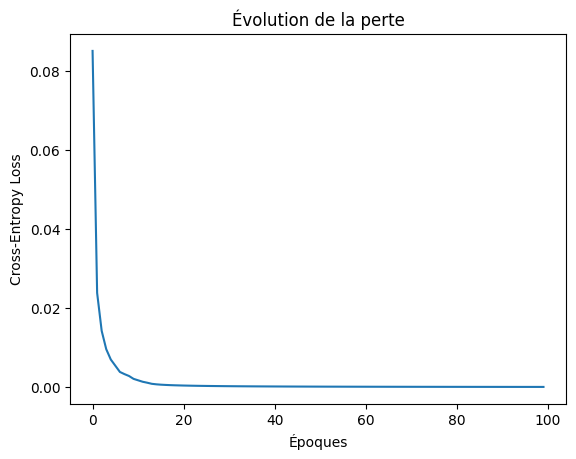

Précision sur le test : 0.9787


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from mltools import *

def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Époque {epoch}, Perte : {losses[-1]:.4f}")

    return losses, network

network = Sequentiel(
    Linear(784, 128),  # Exemple pour MNIST (entrée 28x28=784)
    TanH(),
    Linear(128, 64),
    TanH(),
    Linear(64, 10),  # 10 classes (chiffres 0 à 9)
    Softmax()  # On peut aussi utiliser LogSoftmax et CrossEntropy combinée
)
loss = CrossEntropyLoss()

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

mnist = fetch_openml("mnist_784", version=1)
datax, datay = mnist.data, mnist.target.astype(int)

datax = datax / 255.0
datax = datax.to_numpy()
datay = datay.to_numpy()

encoder = OneHotEncoder(sparse_output=False)
datay = encoder.fit_transform(datay.reshape(-1, 1))



x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

losses, trained_model = SGD(network, x_train, y_train, loss, batch_size=32, lr=0.01, epochs=100)

plt.plot(losses)
plt.title("Évolution de la perte")
plt.xlabel("Époques")
plt.ylabel("Cross-Entropy Loss")
plt.show()

predictions = trained_model.forward(x_test)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
print(f"Précision sur le test : {accuracy:.4f}")
